In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
train_images, test_images = train_images/255.0, test_images/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#train_images # A 3d array containing RGB values for each pixel
# images are 32 by 32

Text(0.5, 0, 'bird')

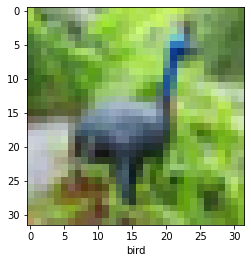

In [5]:
index = 6
plt.imshow(train_images[index])
plt.xlabel(class_names[train_labels[index][0]])

**CNN**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5013 - accuracy: 0.4523 - val_loss: 1.2533 - val_accuracy: 0.5431
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1407 - accuracy: 0.5978 - val_loss: 1.0594 - val_accuracy: 0.6339
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9925 - accuracy: 0.6513 - val_loss: 0.9540 - val_accuracy: 0.6686
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9030 - accuracy: 0.6839 - val_loss: 0.9402 - val_accuracy: 0.6716
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8305 - accuracy: 0.7091 - val_loss: 0.9003 - val_accuracy: 0.6881


In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9003 - accuracy: 0.6881 - 679ms/epoch - 2ms/step
0.6880999803543091


**Data Augmentation**

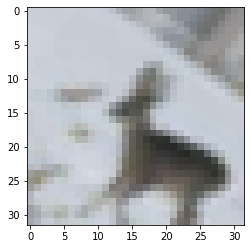

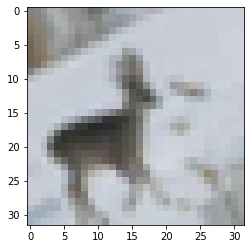

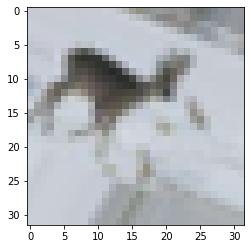

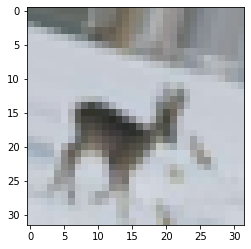

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i >= 4:  # show 4 images
        break

plt.show()

In [20]:
batch[0]

array([[[0.38349903, 0.4131552 , 0.40735433],
        [0.3947585 , 0.42103684, 0.41411   ],
        [0.40266374, 0.4257739 , 0.41751146],
        ...,
        [0.5735754 , 0.590288  , 0.6123698 ],
        [0.5721009 , 0.5821289 , 0.5965266 ],
        [0.56634176, 0.5782364 , 0.5901311 ]],

       [[0.3565622 , 0.3979641 , 0.39607844],
        [0.36106598, 0.39909002, 0.39607844],
        [0.3668656 , 0.40151182, 0.39737427],
        ...,
        [0.5714699 , 0.586077  , 0.60710603],
        [0.57420635, 0.5831816 , 0.59442115],
        [0.56107795, 0.5750781 , 0.58907837]],

       [[0.52762324, 0.5665637 , 0.57671165],
        [0.42854   , 0.47198424, 0.47650245],
        [0.34990883, 0.39630073, 0.39607844],
        ...,
        [0.56936437, 0.58186597, 0.6018422 ],
        [0.5763119 , 0.5842344 , 0.5923156 ],
        [0.5587503 , 0.5752754 , 0.59138113]],

       ...,

       [[0.8119691 , 0.8276554 , 0.8629495 ],
        [0.8123624 , 0.82891184, 0.86420596],
        [0.7887755 , 0